In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("glass_csv.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

TypeError: '<=' not supported between instances of 'float' and 'str'

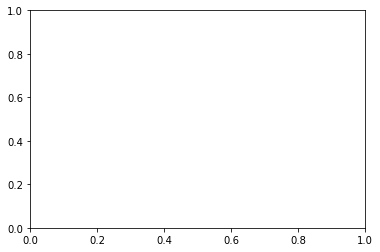

In [8]:
plt.hist(df)


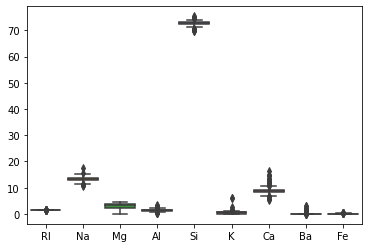

In [9]:
sns.boxplot(data=df)

In [10]:
np.unique(df["Type"])

array(["'build wind float'", "'build wind non-float'",
       "'vehic wind float'", 'containers', 'headlamps', 'tableware'],
      dtype=object)

In [11]:
np.unique(df["Type"])

array(["'build wind float'", "'build wind non-float'",
       "'vehic wind float'", 'containers', 'headlamps', 'tableware'],
      dtype=object)

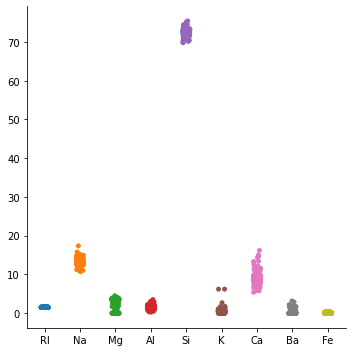

In [12]:
sns.catplot(data=df)


ValueError: could not convert string to float: "'build wind float'"

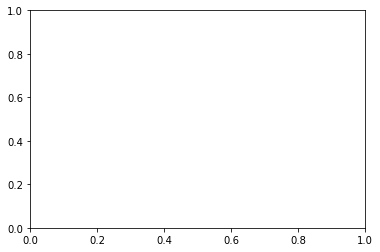

In [13]:
sns.distplot(df)


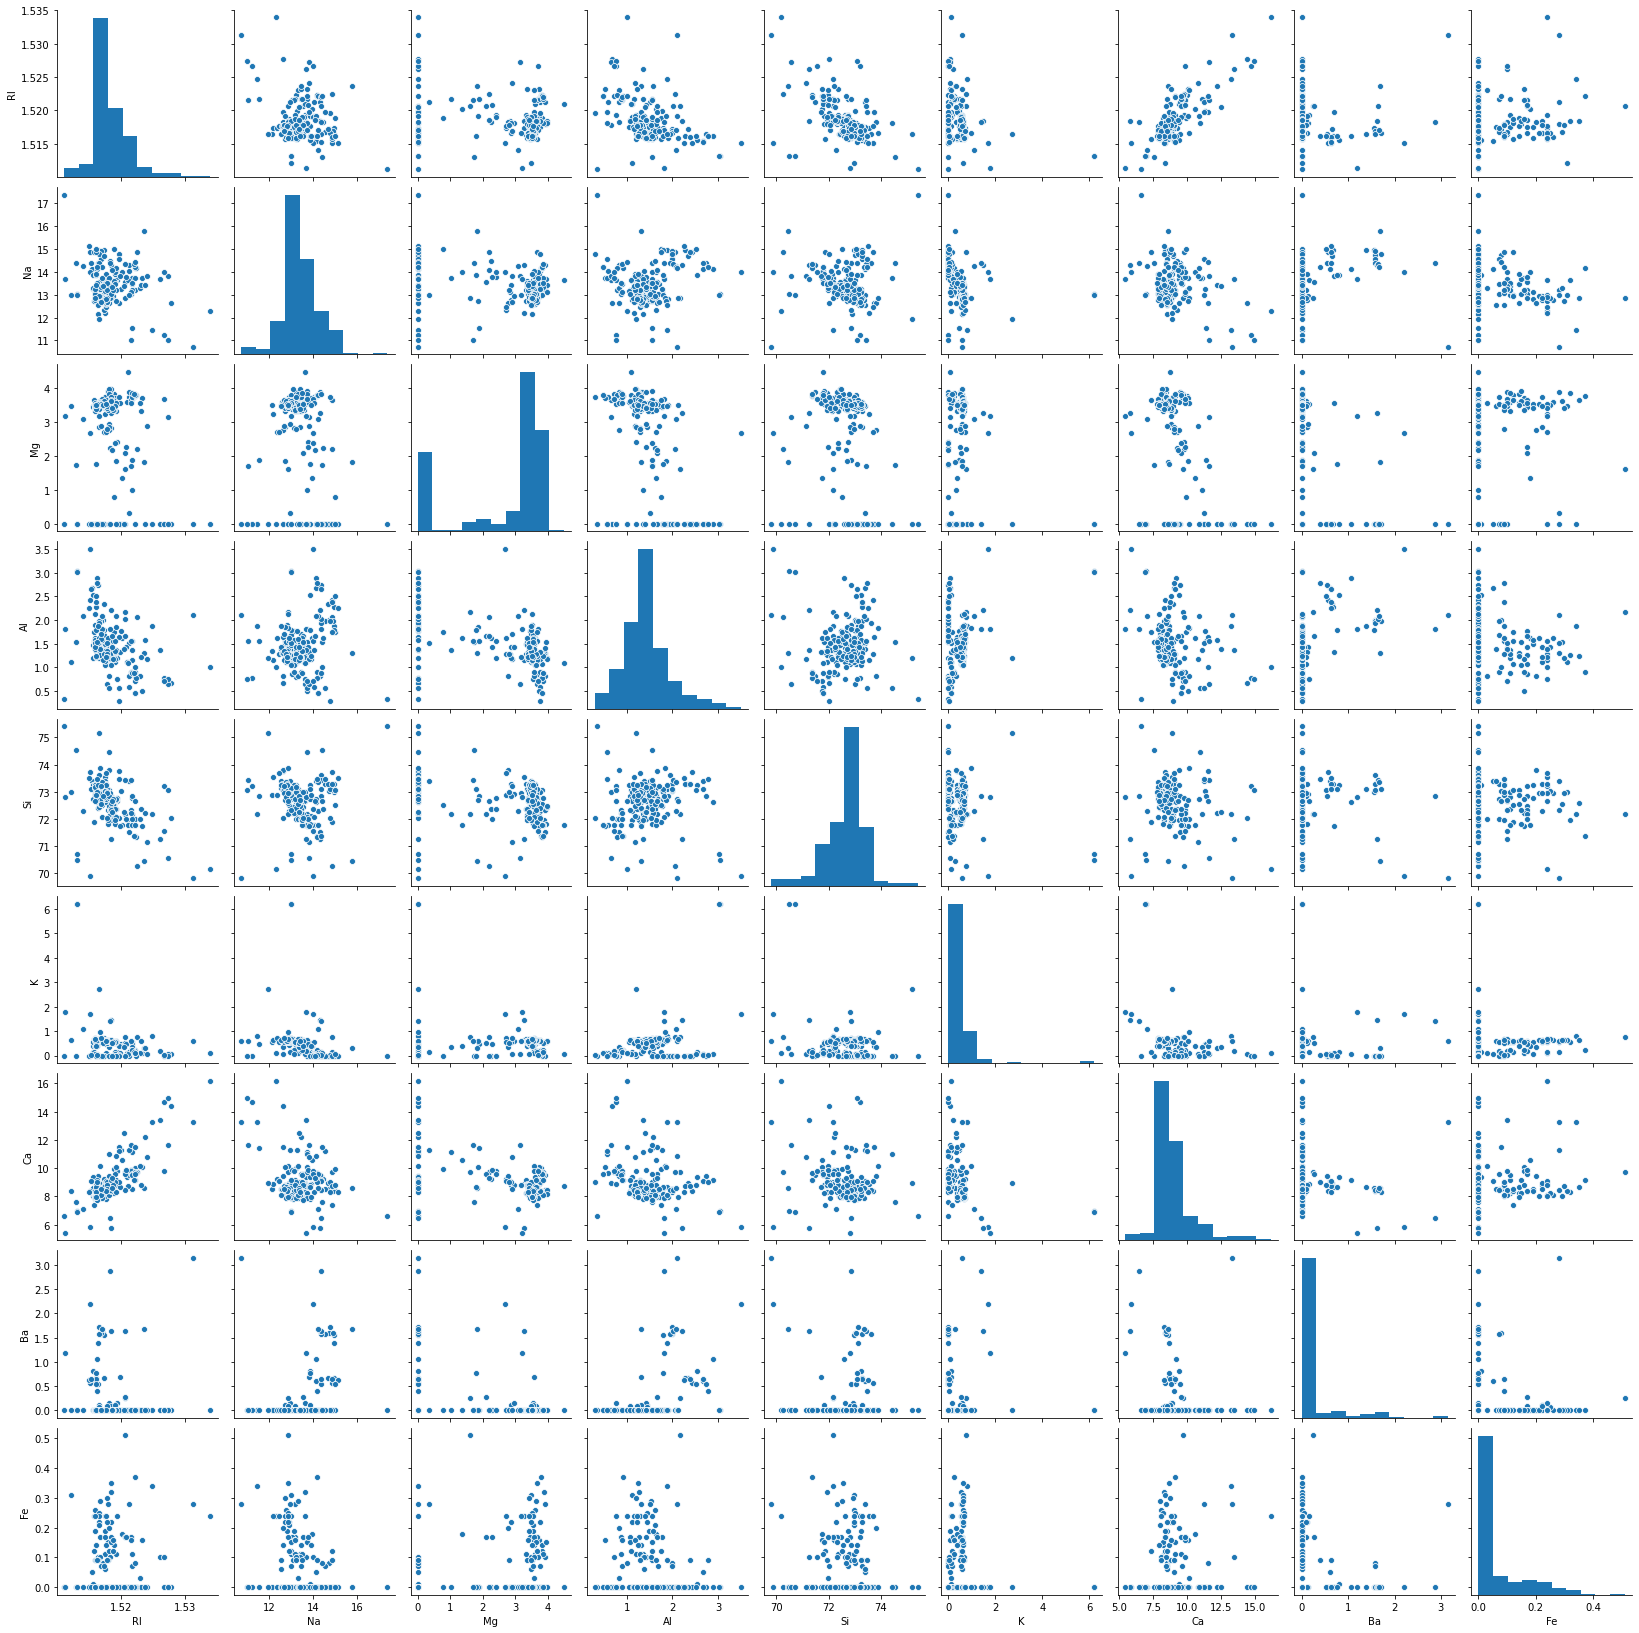

In [14]:
sns.pairplot(data=df)


In [15]:
df.corr()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


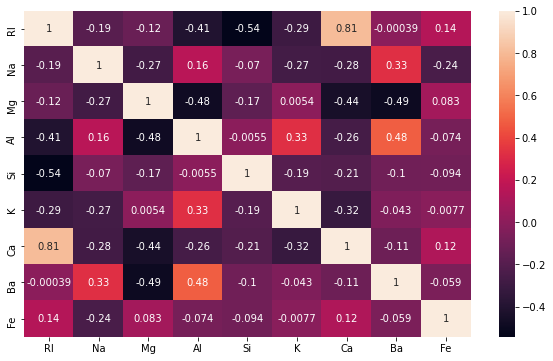

In [16]:
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(),annot=True)

In [17]:
x=df.drop(columns=["Type"])
y=df["Type"]

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

### LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)


C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
ypred=model.predict(xtest)

In [21]:
ypred.shape

(43,)

### Evaluation

accuracy is: 0.627906976744186
                        precision    recall  f1-score   support

    'build wind float'       0.57      0.62      0.59        13
'build wind non-float'       0.64      0.70      0.67        20
    'vehic wind float'       0.00      0.00      0.00         2
            containers       0.67      0.67      0.67         3
             headlamps       0.75      0.75      0.75         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.63        43
             macro avg       0.44      0.46      0.45        43
          weighted avg       0.59      0.63      0.61        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


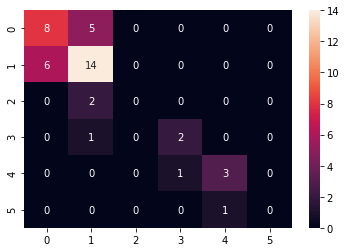

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(sc_xtrain,ytrain)

LogisticRegression()

In [25]:
ypred=model.predict(sc_xtest)

accuracy is: 0.627906976744186
                        precision    recall  f1-score   support

    'build wind float'       0.62      0.38      0.48        13
'build wind non-float'       0.68      0.85      0.76        20
    'vehic wind float'       0.00      0.00      0.00         2
            containers       0.67      0.67      0.67         3
             headlamps       0.75      0.75      0.75         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.63        43
             macro avg       0.45      0.44      0.44        43
          weighted avg       0.62      0.63      0.61        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


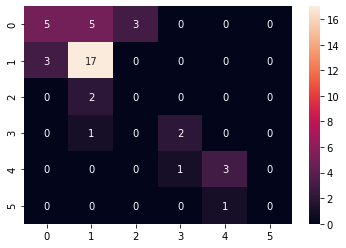

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Hyperparameter Tuning

In [27]:
model=LogisticRegression()
#Parameters
solver=['newton-cg','lbfgs','liblinear','sag','saga']
multi_class=['auto','ovr','multinomial']
penalty=['l1','l2','elasticnet']
grid=dict(solver=solver,multi_class=multi_class,penalty=penalty)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=0)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(sc_xtrain,ytrain)

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [28]:
res.best_score_

0.5929411764705883

In [29]:
res.best_params_

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='auto',penalty='l1',solver='saga')
model.fit(sc_xtrain,ytrain)

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='l1', solver='saga')

In [31]:
ypred=model.predict(sc_xtest)

[[ 6  5  2  0  0  0]
 [ 3 17  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  1  3  0]
 [ 0  0  0  0  1  0]]
accuracy is: 0.6511627906976745
                        precision    recall  f1-score   support

    'build wind float'       0.60      0.46      0.52        13
'build wind non-float'       0.71      0.85      0.77        20
    'vehic wind float'       0.00      0.00      0.00         2
            containers       0.67      0.67      0.67         3
             headlamps       0.75      0.75      0.75         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.65        43
             macro avg       0.45      0.45      0.45        43
          weighted avg       0.63      0.65      0.63        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


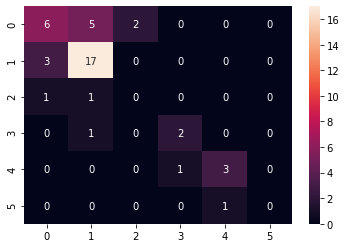

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=50)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

### Evaluation

[[12  1  0  0  0  0]
 [10 10  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  0  0  3  0]
 [ 1  0  0  0  3  0]
 [ 0  0  0  0  1  0]]
accuracy is: 0.5813953488372093
                        precision    recall  f1-score   support

    'build wind float'       0.50      0.92      0.65        13
'build wind non-float'       0.83      0.50      0.62        20
    'vehic wind float'       0.00      0.00      0.00         2
            containers       0.00      0.00      0.00         3
             headlamps       0.43      0.75      0.55         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.58        43
             macro avg       0.29      0.36      0.30        43
          weighted avg       0.58      0.58      0.54        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


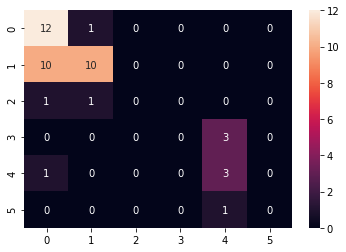

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### hyperparameter tuning

In [35]:
help(KNeighborsClassifier(n_neighbors=50))

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of 

In [38]:
model=KNeighborsClassifier()
#parameters
n_neighbors=[50,100,130]
weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
grid=dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=0)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)

0.5829131652661064


In [39]:
res.best_params_

{'algorithm': 'auto', 'n_neighbors': 50, 'weights': 'distance'}

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=50,weights='distance',algorithm='auto')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

[[12  1  0  0  0  0]
 [ 6 14  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  0  1  2  0]
 [ 1  0  0  0  3  0]
 [ 0  0  0  0  1  0]]
accuracy is: 0.6976744186046512
                        precision    recall  f1-score   support

    'build wind float'       0.60      0.92      0.73        13
'build wind non-float'       0.88      0.70      0.78        20
    'vehic wind float'       0.00      0.00      0.00         2
            containers       1.00      0.33      0.50         3
             headlamps       0.50      0.75      0.60         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.70        43
             macro avg       0.50      0.45      0.43        43
          weighted avg       0.70      0.70      0.67        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


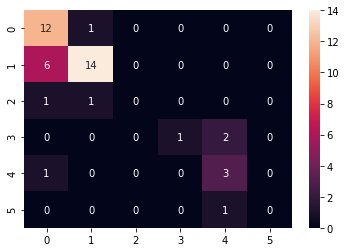

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

accuracy is: 0.7674418604651163
                        precision    recall  f1-score   support

    'build wind float'       0.77      0.77      0.77        13
'build wind non-float'       0.88      0.75      0.81        20
    'vehic wind float'       0.40      1.00      0.57         2
            containers       1.00      0.67      0.80         3
             headlamps       0.75      0.75      0.75         4
             tableware       0.50      1.00      0.67         1

              accuracy                           0.77        43
             macro avg       0.72      0.82      0.73        43
          weighted avg       0.81      0.77      0.78        43



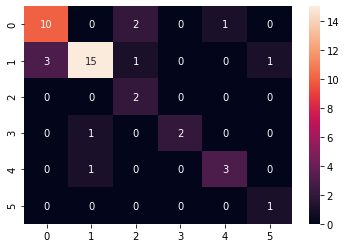

In [44]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [ ]:
#decisiontreeclassifier on scaled data

In [45]:
model=DecisionTreeClassifier()
model.fit(sc_xtrain,ytrain)
ypred=model.predict(sc_xtest)

accuracy is: 0.627906976744186
                        precision    recall  f1-score   support

    'build wind float'       0.58      0.54      0.56        13
'build wind non-float'       0.80      0.60      0.69        20
    'vehic wind float'       0.17      0.50      0.25         2
            containers       0.75      1.00      0.86         3
             headlamps       0.75      0.75      0.75         4
             tableware       0.50      1.00      0.67         1

              accuracy                           0.63        43
             macro avg       0.59      0.73      0.63        43
          weighted avg       0.69      0.63      0.64        43



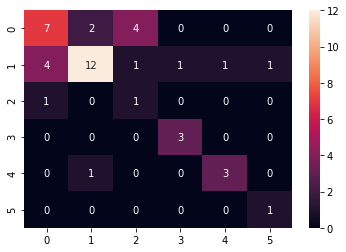

In [46]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))


In [48]:
#hyperparameter tuning

In [49]:
model=DecisionTreeClassifier()
#parameters
splitter=["best", "random"]
criterion=["gini", "entropy"]
max_features=["auto", "sqrt", "log2"]
grid=dict(splitter=splitter,criterion=criterion,max_features=max_features)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=0)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)

In [50]:
res.best_params_


{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

In [51]:
res.best_score_

0.6550140056022408

In [52]:
model=DecisionTreeClassifier(criterion='gini',max_features='auto',splitter='best')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

accuracy is: 0.7674418604651163
                        precision    recall  f1-score   support

    'build wind float'       0.90      0.69      0.78        13
'build wind non-float'       0.86      0.90      0.88        20
    'vehic wind float'       0.20      0.50      0.29         2
            containers       0.67      0.67      0.67         3
             headlamps       0.75      0.75      0.75         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.77        43
             macro avg       0.56      0.58      0.56        43
          weighted avg       0.80      0.77      0.77        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


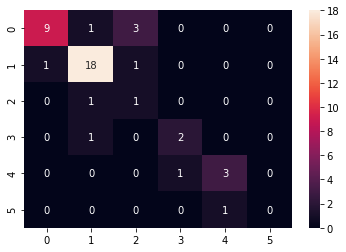

In [53]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))


### RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)


RandomForestClassifier()

In [55]:
ypred=model.predict(xtest)

accuracy is: 0.9069767441860465
                        precision    recall  f1-score   support

    'build wind float'       1.00      0.92      0.96        13
'build wind non-float'       0.90      0.95      0.93        20
    'vehic wind float'       0.50      1.00      0.67         2
            containers       1.00      0.67      0.80         3
             headlamps       1.00      0.75      0.86         4
             tableware       1.00      1.00      1.00         1

              accuracy                           0.91        43
             macro avg       0.90      0.88      0.87        43
          weighted avg       0.93      0.91      0.91        43



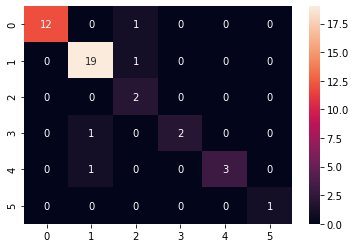

In [56]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))


### Hyperparameter Tuning

In [64]:
model=RandomForestClassifier()
#parameters
criterion=["gini", "entropy"]
n_estimators=[5,50,100]
max_features=["auto", "sqrt", "log2"]
class_weight=["balanced", "balanced_subsample"]
grid=dict(n_estimators=n_estimators,criterion=criterion,max_features=max_features,class_weight=class_weight)
#cv
          
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=0)
#GridSearchCV
          
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
0.740672268907563


In [66]:
model=RandomForestClassifier(class_weight='balanced_subsample', criterion= 'gini', max_features='sqrt',n_estimators=50)
model.fit(xtrain,ytrain)

RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       n_estimators=50)

In [67]:
ypred=model.predict(xtest)

accuracy is: 0.9302325581395349
                        precision    recall  f1-score   support

    'build wind float'       1.00      0.92      0.96        13
'build wind non-float'       1.00      0.95      0.97        20
    'vehic wind float'       0.50      1.00      0.67         2
            containers       0.75      1.00      0.86         3
             headlamps       1.00      0.75      0.86         4
             tableware       1.00      1.00      1.00         1

              accuracy                           0.93        43
             macro avg       0.88      0.94      0.89        43
          weighted avg       0.96      0.93      0.94        43



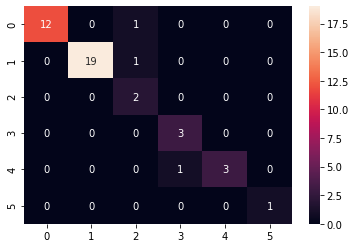

In [68]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))


### SVM

In [69]:
from sklearn.svm import SVC

In [70]:
model=SVC()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

### Evaluation

accuracy is: 0.3023255813953488
                        precision    recall  f1-score   support

    'build wind float'       0.30      1.00      0.46        13
'build wind non-float'       0.00      0.00      0.00        20
    'vehic wind float'       0.00      0.00      0.00         2
            containers       0.00      0.00      0.00         3
             headlamps       0.00      0.00      0.00         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.30        43
             macro avg       0.05      0.17      0.08        43
          weighted avg       0.09      0.30      0.14        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


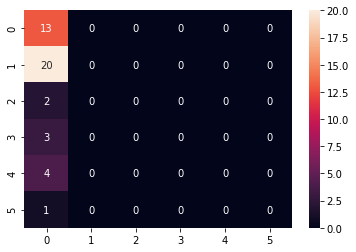

In [71]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))


### GaussianNB

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
model=GaussianNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

### Evaluation

accuracy is: 0.4418604651162791
                        precision    recall  f1-score   support

    'build wind float'       0.38      0.69      0.49        13
'build wind non-float'       0.67      0.20      0.31        20
    'vehic wind float'       0.20      0.50      0.29         2
            containers       0.33      0.33      0.33         3
             headlamps       1.00      0.75      0.86         4
             tableware       0.50      1.00      0.67         1

              accuracy                           0.44        43
             macro avg       0.51      0.58      0.49        43
          weighted avg       0.56      0.44      0.42        43



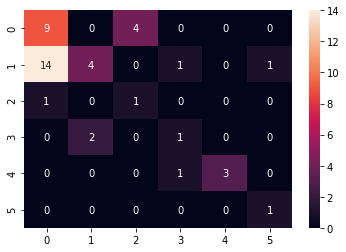

In [74]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))


### MultinomialNB

In [75]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

### Evaluation

accuracy is: 0.4883720930232558
                        precision    recall  f1-score   support

    'build wind float'       0.43      0.92      0.59        13
'build wind non-float'       0.86      0.30      0.44        20
    'vehic wind float'       0.00      0.00      0.00         2
            containers       0.00      0.00      0.00         3
             headlamps       0.43      0.75      0.55         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.49        43
             macro avg       0.29      0.33      0.26        43
          weighted avg       0.57      0.49      0.43        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


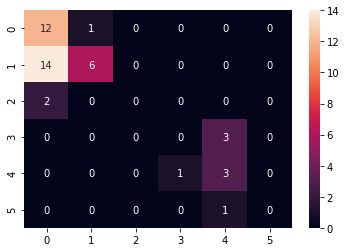

In [76]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### AdaBoostClassifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=100)
model.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100)

In [78]:
ypred=model.predict(xtest)

### Evaluation

accuracy is: 0.3953488372093023
                        precision    recall  f1-score   support

    'build wind float'       0.42      1.00      0.59        13
'build wind non-float'       0.33      0.20      0.25        20
    'vehic wind float'       0.00      0.00      0.00         2
            containers       0.00      0.00      0.00         3
             headlamps       0.00      0.00      0.00         4
             tableware       0.00      0.00      0.00         1

              accuracy                           0.40        43
             macro avg       0.13      0.20      0.14        43
          weighted avg       0.28      0.40      0.29        43



C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


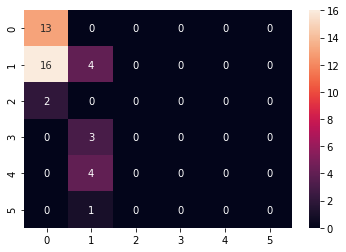

In [79]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### GradientBoostingClassifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [81]:
ypred=model.predict(xtest)

### Evaluation

accuracy is: 0.8837209302325582
                        precision    recall  f1-score   support

    'build wind float'       1.00      0.92      0.96        13
'build wind non-float'       0.90      0.90      0.90        20
    'vehic wind float'       0.50      1.00      0.67         2
            containers       0.67      0.67      0.67         3
             headlamps       1.00      0.75      0.86         4
             tableware       1.00      1.00      1.00         1

              accuracy                           0.88        43
             macro avg       0.84      0.87      0.84        43
          weighted avg       0.91      0.88      0.89        43



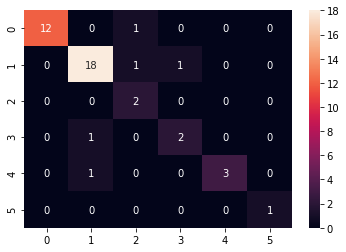

In [82]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Hyperparameter Tuning

In [83]:
model=GradientBoostingClassifier()
#parameters
loss=['deviance', 'exponential']
learning_rate=[0.1,1]
criterion=['friedman_mse', 'mse', 'mae']
max_features=['auto', 'sqrt', 'log2']
#grid
grid=dict(loss=loss,learning_rate=learning_rate,criterion=criterion,max_features=max_features)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)




C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 441, in fit
    self._check_params()
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 248, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py", line 792, in __init__
    raise ValueError("{0:s} requires 2 classes; got {1:d} class(es)"
ValueError: ExponentialLoss requires 2 classes; got 6 class(es)

  warnings.warn("Estimator fit failed. The score on this train-test"
C

best parameters are: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_features': 'log2'}
best score: 0.7113725490196078


In [86]:
print("best parameters are:",res.best_params_)

best parameters are: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_features': 'log2'}


In [84]:
print("best score:",res.best_score_)

best score: 0.7113725490196078


In [87]:
model=GradientBoostingClassifier(criterion='friedman_mse',learning_rate= 0.1, loss='deviance',max_features='log2')
model.fit(xtrain,ytrain)

GradientBoostingClassifier(max_features='log2')

In [88]:
ypred=model.predict(xtest)


accuracy is: 0.9302325581395349
                        precision    recall  f1-score   support

    'build wind float'       1.00      0.92      0.96        13
'build wind non-float'       0.95      0.95      0.95        20
    'vehic wind float'       0.50      1.00      0.67         2
            containers       1.00      1.00      1.00         3
             headlamps       1.00      0.75      0.86         4
             tableware       1.00      1.00      1.00         1

              accuracy                           0.93        43
             macro avg       0.91      0.94      0.91        43
          weighted avg       0.95      0.93      0.94        43



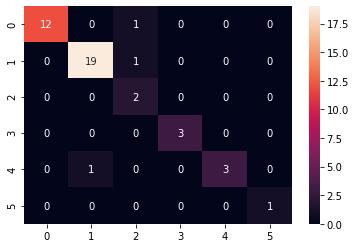

In [89]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [96]:
model=["LogisticRegression","LogisticRegression after scaling","LogisticRegression after tuning","KNeighborsClassifier","KNeighborsClassifier after tuning","DecisionTreeClassifier","DecisionTreeClassifier after tuning","RandomForestClassifier","RandomForestClassifier after tuning","svm","GaussioanNB","MultinomialNB","AdaBoostClassifier","GradientBoostingClassifier","GradientBoostingClassifier after tuning"]

In [99]:
accuracy=[  0.627906976744186, 0.5929411764705883,0.5813953488372093,0.5829131652661064,0.7674418604651163,0.627906976744186,0.9069767441860465,0.9302325581395349,0.3023255813953488,0.4418604651162791,0.4883720930232558,0.3953488372093023,0.8837209302325582,0.7113725490196078,0.9302325581395349]

In [100]:
pd.DataFrame({"model":model,"Accuracy":accuracy})

,model,Accuracy
0,LogisticRegression,0.627907
1,LogisticRegression after scaling,0.592941
2,LogisticRegression after tuning,0.581395
3,KNeighborsClassifier,0.582913
4,KNeighborsClassifier after tuning,0.767442
5,DecisionTreeClassifier,0.627907
6,DecisionTreeClassifier after tuning,0.906977
7,RandomForestClassifier,0.930233
8,RandomForestClassifier after tuning,0.302326
9,svm,0.441860
